#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

# Assignment 2: Covid data - Hazel Chan - May 2, 2022

In this notebook, the sections of the report will be indicated with bold **REPORT** title.

## 0. Introduction (Objective of Analysis)

**Report:** This report outlines the approach used and insights observed in data analytics process of the UK covid and vaccination datasets to help the UK government increase vaccination rates through marketing campaigns of promoting covid vaccines. 

### 0.1 Environment preparation

In [1]:
# Import the required libraries and set plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

**Amend here:** Please change path your own directory of where the data files are stored.

In [2]:
# View current directory
!pwd

/Users/hazel/Documents/LSE Data Analytics/Course 2 - Python/Assignment 2/Final


In [3]:
# Create variable to store directory and load data files
dir = '/Users/hazel/Documents/LSE Data Analytics/Course 2 - Python/Assignment 2/Final/Data'

## 1) Assignment activity 1: [Prepare your GitHub repository](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-1-prepare-your-github-repository?module_item_id=20647)

### 1.1) Report:
**Report:** A GitHub repository was created to store data files and code in the cloud. This acts as version control when new changes are made without affecting main branch before approval.

#### Github Repository
- [My Github Repo](https://github.com/hazz292/LSE_DA_COVID_analysis_Hazel) (Set to public)
- My Github Screenshot

![My Github screenshot](https://github.com/hazz292/LSE_DA_COVID_analysis_Hazel/blob/main/github_screenshot.png?raw=true)

## 2) Assignment activity 2: [Import and explore data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-2-import-and-explore-the-data?module_item_id=20648)

### 2.1) Report:
**Report:** Data files were imported into python environment to explore data. The shape, data type, descriptive statistics, and unique values of data sets were analysed before determining variables of interest. Then, missing data was identified and replaced with zero to prevent errors. After cleaning dataset, a subset was created with variables of interest related to covid and vaccination DataFrame.

#### Load the covid cases and vaccine data sets as cov and vac respectively

In [4]:
# Show the files in child directory to get file names
!ls Data/

covid_19_uk_cases.csv      tweets.csv
covid_19_uk_vaccinated.csv tweets_2.csv
global_data.csv


In [5]:
# Import datasets
cov_uk = pd.read_csv(dir + '/covid_19_uk_cases.csv')
vac_uk = pd.read_csv(dir + '/covid_19_uk_vaccinated.csv')

print('Imported csv files successfully')

Imported csv files successfully


### Explore the DataFrames with the appropriate functions

**Report:** In initial exploration, the data sets include covid and vaccination numbers of 12 provinces in the United Kingdom. Most of the provinces are British Overseas Territories and ‘Others’ is the mainland comprising of England, Wales, Scotland, and Northern Ireland as numbers are significantly larger than others when aggregated. The number of counts is the same for each province as 632 rows represents number of days from 22 January 2020 to 14 October 2021. By viewing the head and tail of both DataFrames, the variables of interests can be either cumulative or daily, therefore, should be plotted on a line chart to visualise. 

#### DataFrame 1: Covid Cases UK DataFrame

In [6]:
# View number of rows and columns
print('\nNumber of rows and columns of DataFrame:')
cov_uk.shape


Number of rows and columns of DataFrame:


(7584, 12)

In [7]:
# View information about DataFrame
print('\nDatatype of deach column:\n')
cov_uk.info()


Datatype of deach column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 711.1+ KB


In [8]:
# View first and last 5 rows of DataFrame
cov_uk

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0


In [9]:
# View last 10 rows of one province to determine whether variables are cumulative.
cov_uk.loc[cov_uk['Province/State'] == 'Gibraltar'].tail(10)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
4414,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-05,97.0,5590.0,0.0,858.0
4415,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-06,97.0,5597.0,0.0,856.0
4416,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-07,97.0,5606.0,0.0,848.0
4417,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-08,97.0,5608.0,0.0,845.0
4418,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-09,97.0,5613.0,0.0,838.0
4419,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-10,97.0,5626.0,0.0,858.0
4420,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-11,97.0,5655.0,0.0,876.0
4421,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-12,97.0,5682.0,0.0,876.0
4422,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-13,97.0,5707.0,0.0,0.0
4423,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-14,97.0,5727.0,0.0,0.0


In [10]:
# View descriptive statistics of DataFrame
cov_uk.describe().round(2)

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.00,7584.00,7584.00,7582.00,7582.00,7582.00,7582.00
mean,21.84,-41.44,12.50,6210.20,214708.15,454.69,685.23
std,28.31,30.53,14.01,24860.79,1007556.94,1010.64,819.26
min,-51.80,-81.25,0.00,0.00,0.00,0.00,0.00
25%,17.85,-64.67,0.00,0.00,12.00,0.00,105.00
50%,20.50,-60.86,2.50,1.00,168.50,13.00,390.00
75%,39.45,-5.15,29.00,25.00,1585.00,312.00,955.75
max,55.38,-2.36,29.00,138237.00,8317439.00,8322.00,4907.00


In [11]:
# view dataframe of a specific date
cov_uk[cov_uk['Date'] == '2021-10-14'].sort_values(by='Cases',ascending=False)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
7583,Others,United Kingdom,55.378100,-3.436000,GBR,Northern Europe,0,2021-10-14,138237.0,8317439.0,0.0,0.0
3159,Channel Islands,United Kingdom,49.372300,-2.364400,Others,Northern Europe,0,2021-10-14,100.0,12135.0,0.0,0.0
5055,Isle of Man,United Kingdom,54.236100,-4.548100,IMN,Northern Europe,0,2021-10-14,54.0,8343.0,0.0,0.0
4423,Gibraltar,United Kingdom,36.140800,-5.353600,GIB,Southern Europe,0,2021-10-14,97.0,5727.0,0.0,0.0
1263,Bermuda,United Kingdom,32.307800,-64.750500,BMU,Northern America,0,2021-10-14,95.0,5548.0,0.0,0.0
6951,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,TCA,Latin America and the Caribbean,29,2021-10-14,23.0,2910.0,0.0,0.0
1895,British Virgin Islands,United Kingdom,18.420700,-64.640000,VGB,Latin America and the Caribbean,29,2021-10-14,37.0,2725.0,0.0,0.0
2527,Cayman Islands,United Kingdom,19.313300,-81.254600,CYM,Latin America and the Caribbean,29,2021-10-14,2.0,1011.0,0.0,0.0
631,Anguilla,United Kingdom,18.220600,-63.068600,AIA,Latin America and the Caribbean,29,2021-10-14,1.0,644.0,0.0,0.0
3791,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,FLK,Latin America and the Caribbean,5,2021-10-14,0.0,69.0,0.0,0.0


In [12]:
# View count of unique values in each province/state in UK
cov_uk.value_counts(subset='Province/State', dropna=False)

Province/State
Anguilla                                        632
Bermuda                                         632
British Virgin Islands                          632
Cayman Islands                                  632
Channel Islands                                 632
Falkland Islands (Malvinas)                     632
Gibraltar                                       632
Isle of Man                                     632
Montserrat                                      632
Others                                          632
Saint Helena, Ascension and Tristan da Cunha    632
Turks and Caicos Islands                        632
dtype: int64

#### Handle missing data

Before aggregating data to view total number of cases and vaccinations for each province, missing values were identified to be replaced with zero. There are two rows of missing data for the province Bermuda in September.

In [13]:
# Determine the number of missing values
cov_uk[cov_uk.isna().any(axis=1)]

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


In [14]:
# Number of missing values in each column
print('\nNumber of rows with missing data in each column: \n')
print(cov_uk.isna().sum().sort_values(ascending=False))


Number of rows with missing data in each column: 

Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
dtype: int64


**Observations:** 

In the UK covid cases data set, there are 2 rows in 12 columns which has missing values

In [15]:
# Replace missing values with zero in entire DataFrame
cov_uk.fillna(0,inplace=True)

# Check if all missing values are replaced with zero
cov_uk.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      0
Cases                       0
Recovered                   0
Hospitalised                0
dtype: int64

#### Clean data and create subset

After cleaning the dataset by replacing missing values with zero and converting variables to the correct datatype, a subset was created with the clean DataFrame. 

In [16]:
# Convert date column data type to DateTime
cov_uk['Date'] = pd.to_datetime(cov_uk['Date'])
cov_uk.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
dtype: object

In [17]:
# Convert deaths, cases, recovered, hospitalised data type to integer
# Number of people cannot be represented by decimal places
cov_uk['Deaths'] = cov_uk['Deaths'].astype('int64')
cov_uk['Cases'] = cov_uk['Cases'].astype('int64')
cov_uk['Recovered'] = cov_uk['Recovered'].astype('int64')
cov_uk['Hospitalised'] = cov_uk['Hospitalised'].astype('int64')

cov_uk.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                               int64
Cases                                int64
Recovered                            int64
Hospitalised                         int64
dtype: object

In [18]:
# Convert Date to Month and add column
cov_uk['Month'] = pd.to_datetime(cov_uk['Date']+pd.offsets.MonthBegin(-1))

# View DataFrame
cov_uk.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Month
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0,0,2020-01-01
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0,0,2020-01-01
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0,0,2020-01-01
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0,0,2020-01-01
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0,0,2020-01-01


In [19]:
# Subset covid cases dataframe
cov_uk_clean = cov_uk[['Province/State', 'Country/Region',
       'Date', 'Month', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised']]

# View subset
cov_uk_clean

,Province/State,Country/Region,Date,Month,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,2020-01-22,2020-01-01,0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,2020-01-01,0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,2020-01-01,0,0,0,0
3,Anguilla,United Kingdom,2020-01-25,2020-01-01,0,0,0,0
4,Anguilla,United Kingdom,2020-01-26,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,2021-10-10,2021-10-01,137735,8154306,0,378
7580,Others,United Kingdom,2021-10-11,2021-10-01,137763,8193769,0,386
7581,Others,United Kingdom,2021-10-12,2021-10-01,137944,8231437,0,386
7582,Others,United Kingdom,2021-10-13,2021-10-01,138080,8272883,0,0


#### DataFrame 2: Covid Vaccination UK DataFrame

In the UK covid vaccination DataFrame, there are same number of observations as cases DataFrame and the variables of interest to analyse for increasing vaccination rate in marketing campaign are Province/State, Date, Vaccinated, First Dose, Second Dose.

In [20]:
# View number of rows and columns
print('\nNumber of rows and column in dataframe:')
vac_uk.shape


Number of rows and column in dataframe:


(7584, 11)

In [21]:
# View information about dataframe
print('\nInformation about dataframe:\n')
vac_uk.info()


Information about dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Vaccinated                7584 non-null   int64  
 9   First Dose                7584 non-null   int64  
 10  Second Dose               7584 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 651.9+ KB


In [22]:
# View first and last 5 rows of dataframe
vac_uk

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,0,0,0


In [23]:
# view descriptive statistics of dataframe
vac_uk.describe().round(2)

,Lat,Long,Intermediate Region Code,Vaccinated,First Dose,Second Dose
count,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00
mean,21.84,-41.44,12.50,5913.55,6192.82,5913.55
std,28.31,30.53,14.01,10846.41,11439.88,10846.41
min,-51.80,-81.25,0.00,0.00,0.00,0.00
25%,17.85,-64.67,0.00,0.00,0.00,0.00
50%,20.50,-60.86,2.50,0.00,0.00,0.00
75%,39.45,-5.15,29.00,8338.00,7505.50,8338.00
max,55.38,-2.36,29.00,69619.00,94038.00,69619.00


In [24]:
# View count of unique values in each province/state in UK
vac_uk.value_counts(subset='Province/State', dropna=False)

Province/State
Anguilla                                        632
Bermuda                                         632
British Virgin Islands                          632
Cayman Islands                                  632
Channel Islands                                 632
Falkland Islands (Malvinas)                     632
Gibraltar                                       632
Isle of Man                                     632
Montserrat                                      632
Others                                          632
Saint Helena, Ascension and Tristan da Cunha    632
Turks and Caicos Islands                        632
dtype: int64

In [25]:
# Determine number of provinces in UK
print(len(vac_uk['Province/State'].unique()))

12


#### Handle missing data

In UK vaccination data set, there are also 12 provinces and there are no missing values. Then data type of Date was converted into datatime and subset of the clean DataFrame was created for analysis. Date was converted into Month to allow aggregation by month for trend analysis.

In [26]:
# Identify of missing values in each column
print('\nNumber of rows with missing data in each column: \n')
print(vac_uk.isna().sum().sort_values(ascending=False))


Number of rows with missing data in each column: 

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64


In [27]:
# convert date column data type to DateTime
vac_uk['Date'] = pd.to_datetime(vac_uk['Date'])
vac_uk.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
dtype: object

In [28]:
# Convert Date to Month and add column
vac_uk['Month'] = pd.to_datetime(vac_uk['Date']+pd.offsets.MonthBegin(-1))

# View DataFrame
vac_uk[['Date','Month']].head()

,Date,Month
0,2020-01-22,2020-01-01
1,2020-01-23,2020-01-01
2,2020-01-24,2020-01-01
3,2020-01-25,2020-01-01
4,2020-01-26,2020-01-01


In [29]:
# Subset covid vaccination dataframe
vac_uk_clean = vac_uk[['Province/State','Date', 'Month',
                 'Vaccinated', 'First Dose','Second Dose']]

# View subset
vac_uk_clean

,Province/State,Date,Month,Vaccinated,First Dose,Second Dose
0,Anguilla,2020-01-22,2020-01-01,0,0,0
1,Anguilla,2020-01-23,2020-01-01,0,0,0
2,Anguilla,2020-01-24,2020-01-01,0,0,0
3,Anguilla,2020-01-25,2020-01-01,0,0,0
4,Anguilla,2020-01-26,2020-01-01,0,0,0
...,...,...,...,...,...,...
7579,Others,2021-10-10,2021-10-01,1070,1216,1070
7580,Others,2021-10-11,2021-10-01,1300,1604,1300
7581,Others,2021-10-12,2021-10-01,1482,2027,1482
7582,Others,2021-10-13,2021-10-01,0,0,0


### Aggregation of clean DataFrame

### Gibraltar Covid Cases

**Report:** Gibraltar vaccination data was filtered to accurately understand behaviour of variables over time.  By plotting each variable in a line chart, cases, deaths, and recovered variables are cumulative as the line increased consistently over time, while hospitalised variable is daily as there are high and low fluctuations. Therefore, hospitalised rate should be aggregated separately with sum() while cases, deaths, recovered should be aggregated with max(). The sudden drop in recovered and hospitalised line plot indicates missing data. 

In [30]:
# Create covid cases DataFrame of Gibraltar
cov_gibraltar = cov_uk_clean[cov_uk_clean['Province/State'] == 'Gibraltar'].reset_index()

print('\nNumber of rows and columns:')
cov_gibraltar.shape


Number of rows and columns:


(632, 9)

In [31]:
# view descriptive statistics
cov_gibraltar.describe().round(2)

,index,Deaths,Cases,Recovered,Hospitalised
count,632.00,632.00,632.00,632.00,632.00
mean,4107.50,40.21,2237.11,1512.82,1027.62
std,182.59,45.33,2136.27,1817.10,1145.68
min,3792.00,0.00,0.00,0.00,0.00
25%,3949.75,0.00,177.00,109.50,157.75
50%,4107.50,5.00,1036.50,323.50,675.50
75%,4265.25,94.00,4286.00,4122.50,1548.00
max,4423.00,97.00,5727.00,4670.00,4907.00


In [32]:
# View first and last 5 rows of DataFrame
cov_gibraltar

,index,Province/State,Country/Region,Date,Month,Deaths,Cases,Recovered,Hospitalised
0,3792,Gibraltar,United Kingdom,2020-01-22,2020-01-01,0,0,0,0
1,3793,Gibraltar,United Kingdom,2020-01-23,2020-01-01,0,0,0,0
2,3794,Gibraltar,United Kingdom,2020-01-24,2020-01-01,0,0,0,0
3,3795,Gibraltar,United Kingdom,2020-01-25,2020-01-01,0,0,0,0
4,3796,Gibraltar,United Kingdom,2020-01-26,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...,...
627,4419,Gibraltar,United Kingdom,2021-10-10,2021-10-01,97,5626,0,858
628,4420,Gibraltar,United Kingdom,2021-10-11,2021-10-01,97,5655,0,876
629,4421,Gibraltar,United Kingdom,2021-10-12,2021-10-01,97,5682,0,876
630,4422,Gibraltar,United Kingdom,2021-10-13,2021-10-01,97,5707,0,0


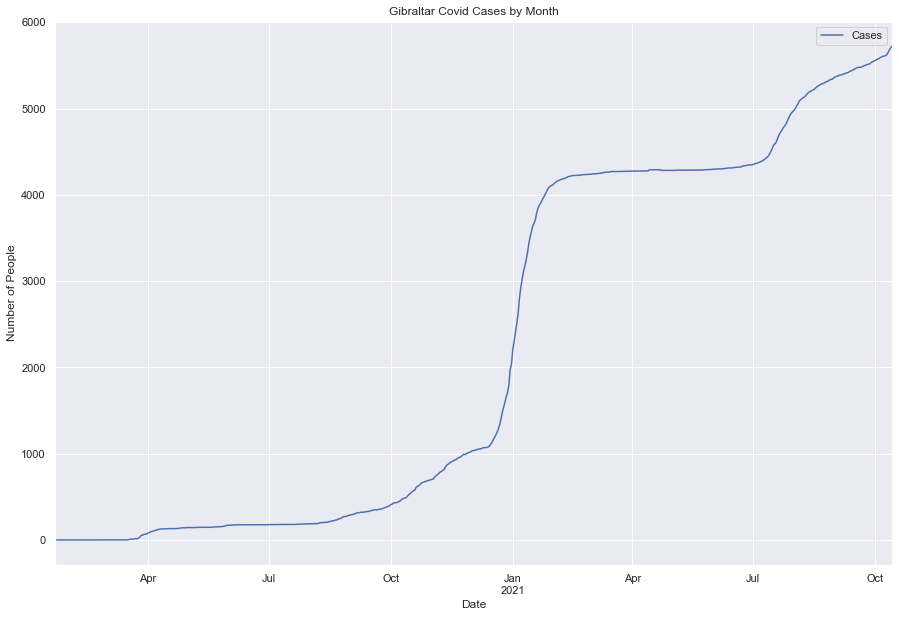

In [33]:
# Create Gilbraltar line plot to explore behavior over time
cov_gibraltar.plot('Date','Cases')
plt.title('Gibraltar Covid Cases by Month')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Gibraltar Covid Cases by Month')

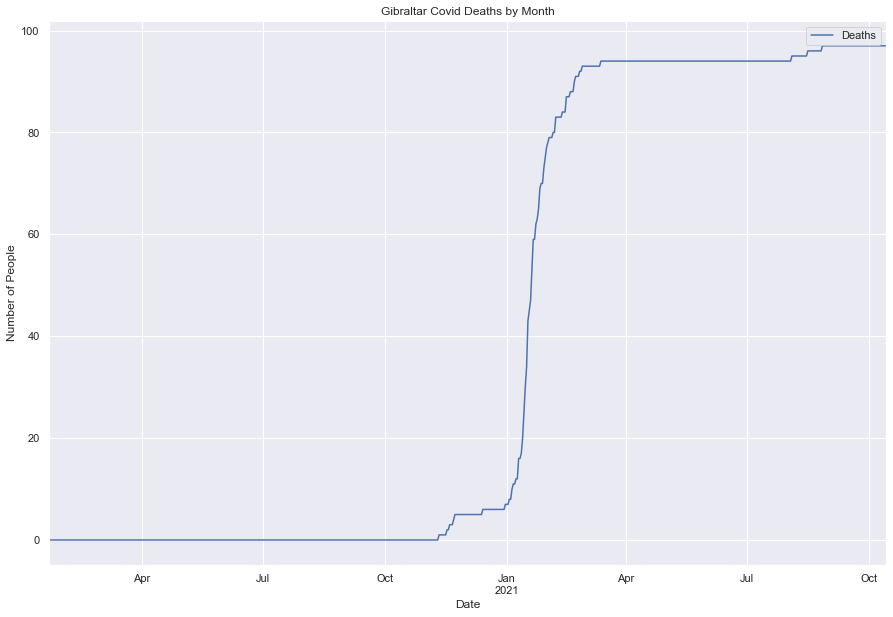

In [34]:
# Line plot of Deaths only to provide better view
cov_gibraltar.plot('Date', 'Deaths', label='Deaths')
plt.title('Gibraltar Covid Deaths by Month')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Gibraltar Covid Deaths by Month')

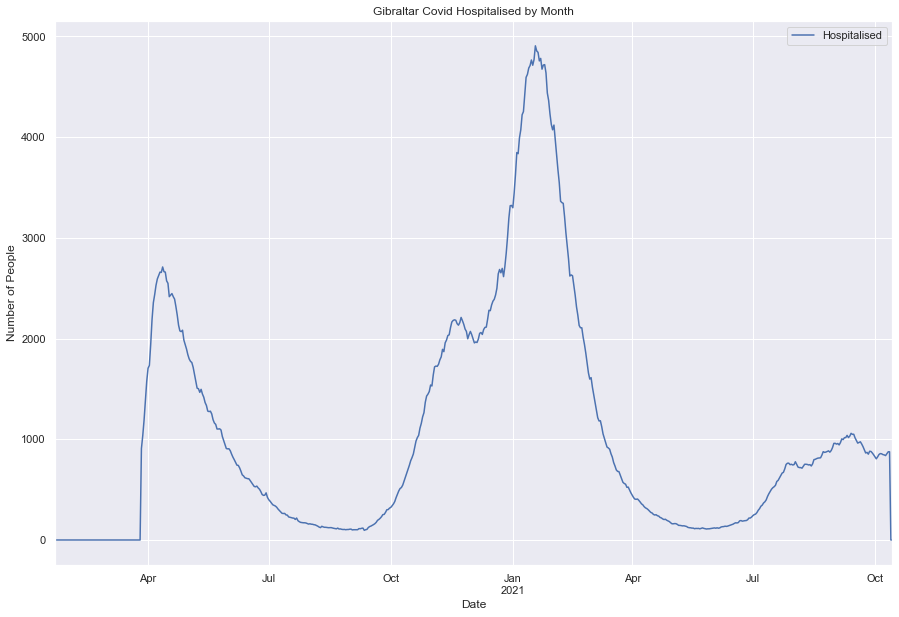

In [35]:
# Line plot of Deaths only to provide better view
cov_gibraltar.plot('Date', 'Hospitalised', label='Hospitalised')
plt.title('Gibraltar Covid Hospitalised by Month')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Gibraltar Covid Hospitalised by Month')

In [36]:
# Find which date hospitalised data begins missing
cov_gibraltar[['Date','Hospitalised']].tail()

,Date,Hospitalised
627,2021-10-10,858
628,2021-10-11,876
629,2021-10-12,876
630,2021-10-13,0
631,2021-10-14,0


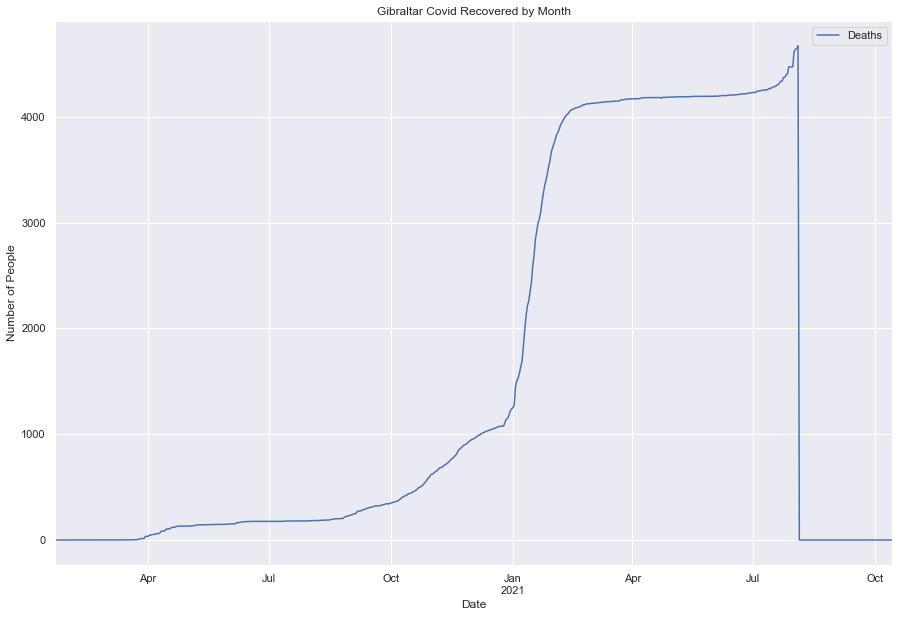

In [37]:
# Line plot of Deaths only to provide better view
cov_gibraltar.plot('Date', 'Recovered', label='Deaths')
plt.title('Gibraltar Covid Recovered by Month')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Gibraltar Covid Recovered by Month')

In [38]:
# Find which date recovered data begins missing
cov_gibraltar.groupby('Month')[['Recovered']].max()

,Recovered
Month,
2020-01-01,0
2020-02-01,0
2020-03-01,34
2020-04-01,131
2020-05-01,151
2020-06-01,176
2020-07-01,182
2020-08-01,237
2020-09-01,349


#### Gibraltar Covid Vaccination

**Report:** According to the line plot, all vaccination variables are daily because the general trend of vaccination decreased after reaching peak. In fact, the population only began to receive vaccines in January 2021 with significant increase from zero in 2020.

From January to March, first dose was higher than second dose. Then, second dose was consistently higher than first dose because majority of population already received first dose and would receive second dose instead. Moreover, vaccinated numbers decreased after reaching peak due to boosters received, therefore no longer qualify as 'vaccinated' which is defined as receiving two doses only.

In [39]:
# Create covid vaccination DataFrame of Gibraltar
vac_gibraltar = vac_uk_clean[vac_uk_clean['Province/State'] == 'Gibraltar']

# View shape
print('\nNumber of rows and columns:\n')
vac_gibraltar.shape


Number of rows and columns:



(632, 6)

In [40]:
# Groupby month
vac_gibraltar_month = vac_gibraltar.groupby('Month')[['First Dose','Second Dose']].sum().reset_index()

# View DataFrame
vac_gibraltar_month

,Month,First Dose,Second Dose
0,2020-01-01,0,0
1,2020-02-01,0,0
2,2020-03-01,0,0
3,2020-04-01,0,0
4,2020-05-01,0,0
5,2020-06-01,0,0
6,2020-07-01,0,0
7,2020-08-01,0,0
8,2020-09-01,0,0
9,2020-10-01,0,0


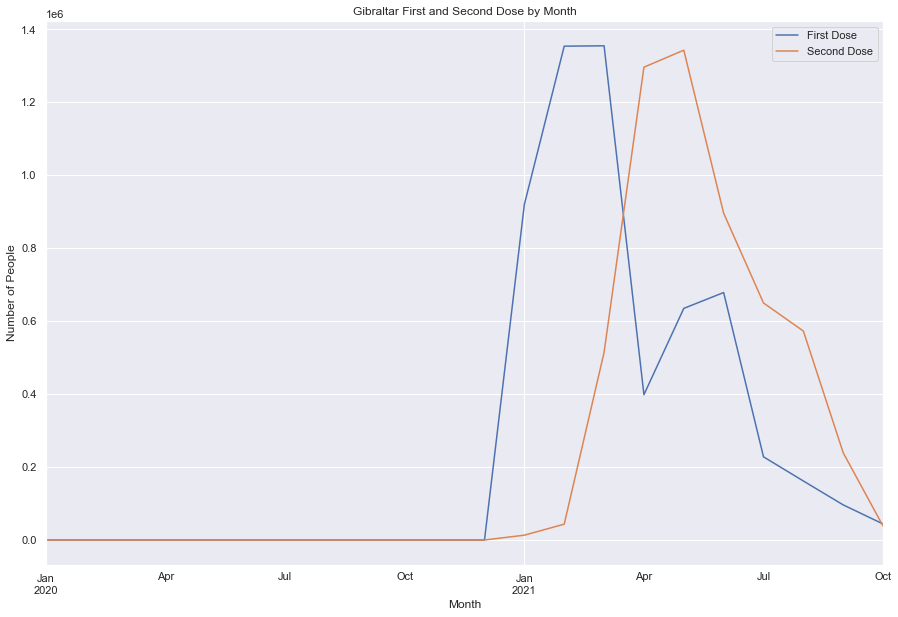

In [41]:
# Create Gilbraltar line plot to explore behavior over time
vac_gibraltar_month.plot('Month', ['First Dose','Second Dose'])
plt.title('Gibraltar First and Second Dose by Month')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Gibraltar First and Second Dose by Month')

In [42]:
# Groupby month
vac_gibraltar_month2 = vac_gibraltar.groupby('Month')[['Vaccinated']].sum().reset_index()

# View DataFrame
vac_gibraltar_month2

,Month,Vaccinated
0,2020-01-01,0
1,2020-02-01,0
2,2020-03-01,0
3,2020-04-01,0
4,2020-05-01,0
5,2020-06-01,0
6,2020-07-01,0
7,2020-08-01,0
8,2020-09-01,0
9,2020-10-01,0


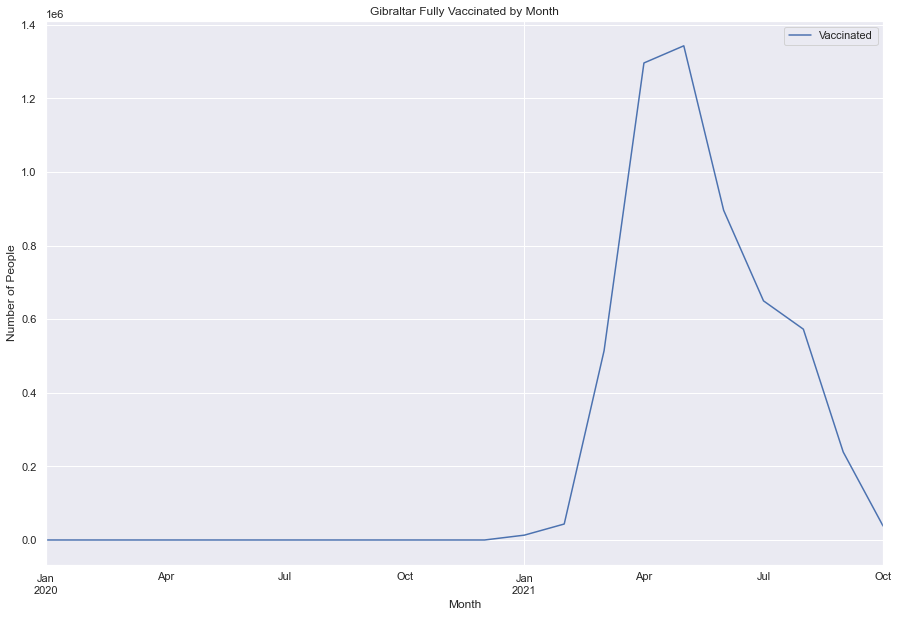

In [43]:
# Plot a line chart for vaccinated separately
vac_gibraltar_month2.plot('Month','Vaccinated')
plt.title('Gibraltar Fully Vaccinated by Month')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Gibraltar Fully Vaccinated by Month')

In [44]:
# Total number of people who are vaccinated, have received the first dose and have received the second dose
vac_gibraltar.groupby(by='Province/State')[['Vaccinated','First Dose','Second Dose']].sum()

,Vaccinated,First Dose,Second Dose
Province/State,,,
Gibraltar,5606041,5870786,5606041


### Aggregate total by province and by month

The province with highest number of cases are Others, Channel Islands and Isle of Man. The significantly large number in Others may correlate with population size.
As in the bar plot below, Gibraltar has the highest number of vaccinations. There is no data of the population, hence, unable to determine the ratio of vaccinated over total population to calculate percentage of population vaccinated to compare on the same basis as islands may have smaller population.
The trend of vaccination is similar across entire UK, where number for second dose exceeded first dose in around March 2021.

In [45]:
# Total number cases for each province excluded Hospitalised because not cumulative
# max() is used because data is cumulative
cov_uk_province = cov_uk_clean.groupby('Province/State')[['Cases','Deaths','Recovered']].max()
cov_uk_province.sort_values(by='Cases',ascending=False)

,Cases,Deaths,Recovered
Province/State,,,
Others,8317439,138237,344
Channel Islands,12135,100,8322
Isle of Man,8343,54,4019
Gibraltar,5727,97,4670
Bermuda,5548,95,2503
Turks and Caicos Islands,2910,23,2433
British Virgin Islands,2725,37,1914
Cayman Islands,1011,2,635
Anguilla,644,1,111


In [46]:
# Total number of vaccination for each province 
# sum() is used because data is daily
vac_uk_province = vac_uk_clean.groupby('Province/State')[['Vaccinated', 'First Dose', 'Second Dose']].sum().round()\
.sort_values(by='Vaccinated',ascending=False)
vac_uk_province

,Vaccinated,First Dose,Second Dose
Province/State,,,
Gibraltar,5606041,5870786,5606041
Montserrat,5157560,5401128,5157560
British Virgin Islands,4933315,5166303,4933315
Anguilla,4709072,4931470,4709072
Isle of Man,4036345,4226984,4036345
Falkland Islands (Malvinas),3587869,3757307,3587869
Cayman Islands,3363624,3522476,3363624
Channel Islands,3139385,3287646,3139385
Turks and Caicos Islands,2915136,3052822,2915136


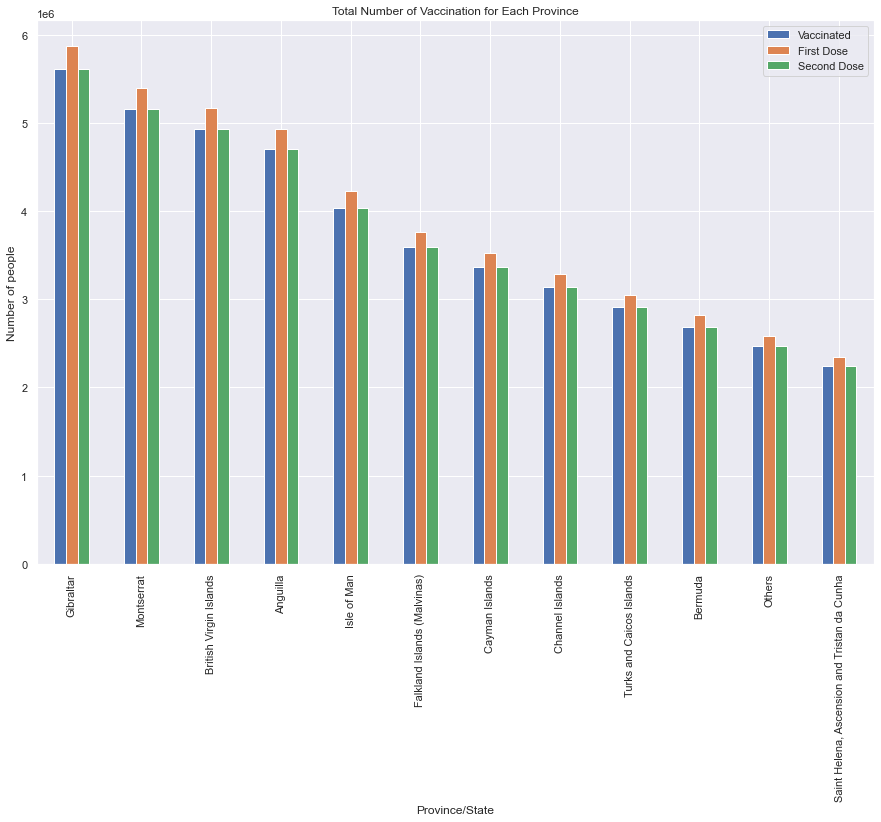

In [47]:
# Plot by province
vac_uk_province.plot.bar()
plt.title('Total Number of Vaccination for Each Province')
plt.ylabel('Number of people')

# Save and export figure
plt.savefig('Total Number of Vaccination for Each Province')

In [48]:
# Total vaccination number by month across UK
vac_uk_month = vac_uk_clean.groupby('Month')[['Vaccinated', 'First Dose', 'Second Dose']].sum()
vac_uk_month.sort_values(by='First Dose',ascending=False)

,Vaccinated,First Dose,Second Dose
Month,,,
2021-03-01,4114780,10839654,4114780
2021-02-01,347306,10831908,347306
2021-01-01,105394,7360139,105394
2021-06-01,7167974,5427834,7167974
2021-05-01,10743658,5080284,10743658
2021-04-01,10370745,3187116,10370745
2021-07-01,5198954,1824109,5198954
2021-08-01,4583146,1294373,4583146
2021-09-01,1912751,769678,1912751


Text(0.5, 1.0, 'Monthly Number of Vaccination Across UK')

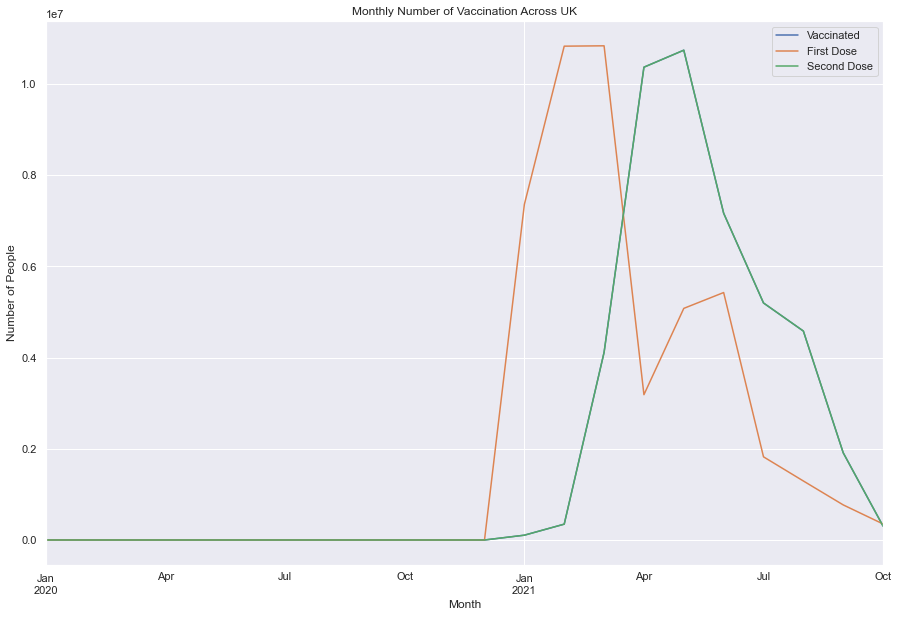

In [49]:
# Plot of total vaccination number by month across UK
vac_uk_month.plot.line()
plt.ylabel('Number of People')
plt.title('Monthly Number of Vaccination Across UK')

## 3) Assignment activity 3: [Merge and analyse the data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-3-merge-and-analyse-the-data?module_item_id=20649)

### 3.1) Report:
**Report:** The covid cases and vaccination DataFrames were merged on inner join to remove duplicate rows, duplicate columns were dropped and data types were explored. The calculation of first dose only in each province was added to the DataFrame. This analysis will identify which top three province the government should target for the campaign to increase vaccination rate. The vaccination variables are plotted over time for interpretation.

### Join the DataFrames as covid where you merge cov and vac 

In [50]:
# Merge on date and province/state
covid_uk = cov_uk_clean.merge(vac_uk_clean, on=['Date','Province/State'], how='inner')

# Clean up / drop unnecessary columns 
covid_uk.drop(list(covid_uk.filter(regex='_y$')), axis=1, inplace=True)

# Print shape of data
covid_uk.shape

(7584, 11)

### Explore the new DataFrame

In [51]:
# Info of new DataFrame
# datatype of date is already fixed as DateTime
covid_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  7584 non-null   object        
 1   Country/Region  7584 non-null   object        
 2   Date            7584 non-null   datetime64[ns]
 3   Month_x         7584 non-null   datetime64[ns]
 4   Deaths          7584 non-null   int64         
 5   Cases           7584 non-null   int64         
 6   Recovered       7584 non-null   int64         
 7   Hospitalised    7584 non-null   int64         
 8   Vaccinated      7584 non-null   int64         
 9   First Dose      7584 non-null   int64         
 10  Second Dose     7584 non-null   int64         
dtypes: datetime64[ns](2), int64(7), object(2)
memory usage: 711.0+ KB


Datatype of date column is fixed as in section 1.

In [52]:
# Descriptive statistics of new DataFrame
covid_uk.describe().round()

,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
count,7584.0,7584.0,7584.0,7584.0,7584.0,7584.0,7584.0
mean,6209.0,214652.0,455.0,685.0,5914.0,6193.0,5914.0
std,24858.0,1007430.0,1011.0,819.0,10846.0,11440.0,10846.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,12.0,0.0,105.0,0.0,0.0,0.0
50%,1.0,168.0,13.0,390.0,0.0,0.0,0.0
75%,25.0,1585.0,312.0,955.0,8338.0,7506.0,8338.0
max,138237.0,8317439.0,8322.0,4907.0,69619.0,94038.0,69619.0


In [53]:
# View merged DataFrame
covid_uk.head()

,Province/State,Country/Region,Date,Month_x,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,2020-01-22,2020-01-01,0,0,0,0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,2020-01-01,0,0,0,0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,2020-01-01,0,0,0,0,0,0,0
3,Anguilla,United Kingdom,2020-01-25,2020-01-01,0,0,0,0,0,0,0
4,Anguilla,United Kingdom,2020-01-26,2020-01-01,0,0,0,0,0,0,0


### Groupby and calculate difference between first and second dose
Formula: First Dose Only = First Dose - Second Dose

In [54]:
# Calculate first dose only column
covid_uk['First Dose Only'] = covid_uk['First Dose'] - covid_uk['Second Dose']
covid_uk

,Province/State,Country/Region,Date,Month_x,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,First Dose Only
0,Anguilla,United Kingdom,2020-01-22,2020-01-01,0,0,0,0,0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,2020-01-01,0,0,0,0,0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,2020-01-01,0,0,0,0,0,0,0,0
3,Anguilla,United Kingdom,2020-01-25,2020-01-01,0,0,0,0,0,0,0,0
4,Anguilla,United Kingdom,2020-01-26,2020-01-01,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,2021-10-10,2021-10-01,137735,8154306,0,378,1070,1216,1070,146
7580,Others,United Kingdom,2021-10-11,2021-10-01,137763,8193769,0,386,1300,1604,1300,304
7581,Others,United Kingdom,2021-10-12,2021-10-01,137944,8231437,0,386,1482,2027,1482,545
7582,Others,United Kingdom,2021-10-13,2021-10-01,138080,8272883,0,0,0,0,0,0


### Province with largest number of people who received only first dose

**Report:** According to the bar plot, the government should target Gibraltar, Montserrat, and British Virgin Islands because they have highest number of people who are eligible to receive second dose. In terms of percentage, all provinces have similar 4.7% of first dose population are eligible for second dose. Since they are part of the same country, the timeframe and vaccination program may be the same, hence resulting in same results.

In [55]:
# Calculation number of individuals who received first dose only
# Sum() is used as data represents daily numbers
covid_uk_province = covid_uk.groupby('Province/State')[['Vaccinated','First Dose', 'Second Dose', 'First Dose Only']].sum()
covid_uk_province.sort_values(by='First Dose Only', ascending=False)

,Vaccinated,First Dose,Second Dose,First Dose Only
Province/State,,,,
Gibraltar,5606041,5870786,5606041,264745
Montserrat,5157560,5401128,5157560,243568
British Virgin Islands,4933315,5166303,4933315,232988
Anguilla,4709072,4931470,4709072,222398
Isle of Man,4036345,4226984,4036345,190639
Falkland Islands (Malvinas),3587869,3757307,3587869,169438
Cayman Islands,3363624,3522476,3363624,158852
Channel Islands,3139385,3287646,3139385,148261
Turks and Caicos Islands,2915136,3052822,2915136,137686


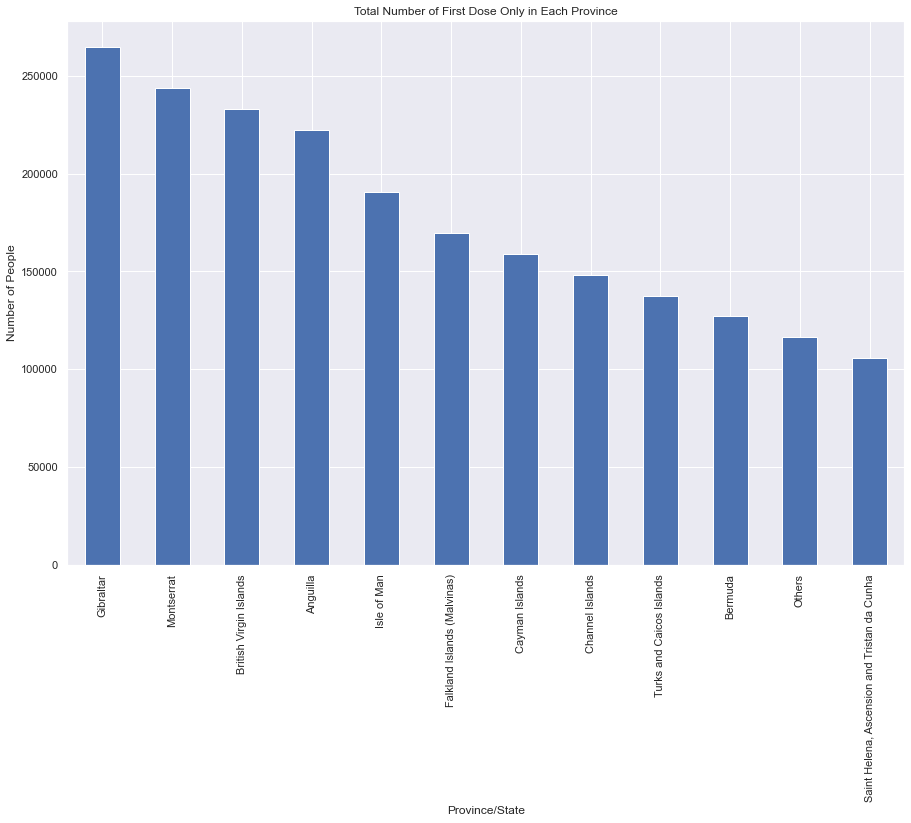

In [56]:
# Plot province with highest number of people who received first dose only
first_only = covid_uk_province['First Dose Only'].sort_values(ascending=False)
first_only.plot.bar()
plt.title('Total Number of First Dose Only in Each Province')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Total Number of First Dose Only in Each Province')

In [57]:
# Calculate percentage of individuals who received first dose only
covid_uk_province['First Dose Only %'] = covid_uk_province['First Dose Only']/covid_uk_province['Second Dose']*100
covid_uk_province['Second Dose %'] = 100 - covid_uk_province['First Dose Only %']
covid_uk_province.sort_values(by='First Dose Only %', ascending=False)

,Vaccinated,First Dose,Second Dose,First Dose Only,First Dose Only %,Second Dose %
Province/State,,,,,,
Turks and Caicos Islands,2915136,3052822,2915136,137686,4.723142,95.276858
Isle of Man,4036345,4226984,4036345,190639,4.723060,95.276940
Anguilla,4709072,4931470,4709072,222398,4.722756,95.277244
British Virgin Islands,4933315,5166303,4933315,232988,4.722747,95.277253
Cayman Islands,3363624,3522476,3363624,158852,4.722644,95.277356
Channel Islands,3139385,3287646,3139385,148261,4.722613,95.277387
Montserrat,5157560,5401128,5157560,243568,4.722543,95.277457
Falkland Islands (Malvinas),3587869,3757307,3587869,169438,4.722525,95.277475
Gibraltar,5606041,5870786,5606041,264745,4.722495,95.277505


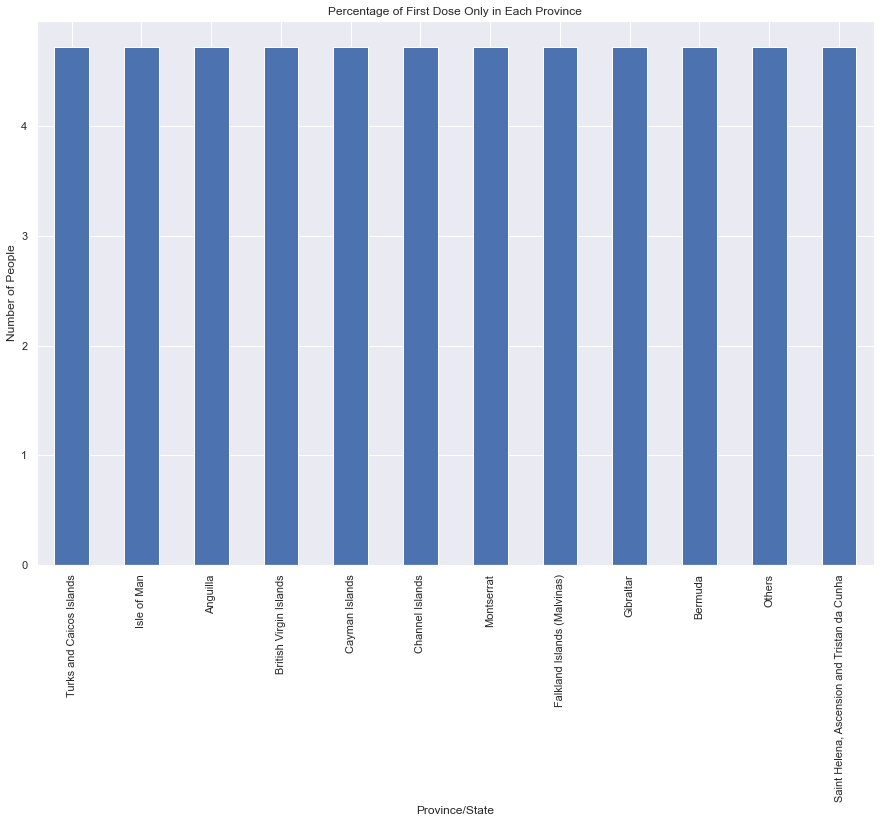

In [58]:
first_only_per = covid_uk_province['First Dose Only %'].sort_values(ascending=False)

# Plot bar graph
first_only_per.plot.bar()
plt.title('Percentage of First Dose Only in Each Province')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Percentage of First Dose Only in Each Province')

### Groupby and calculate difference between first and second dose over time

**Report:** Across entire UK, the number of first dose reached its peak in March, then second dose exceeded first dose. This implies majority received first dose within three months and received second dose within next three months. Therefore, first dose only became negative in April as second dose was greater than first dose.

In [59]:
# Groupby month to view line plot over time
covid_uk_month = covid_uk.groupby('Month_x')[['Vaccinated','First Dose','Second Dose','First Dose Only']].sum()
covid_uk_month.sort_values(by='First Dose',ascending=False)

,Vaccinated,First Dose,Second Dose,First Dose Only
Month_x,,,,
2021-03-01,4114780,10839654,4114780,6724874
2021-02-01,347306,10831908,347306,10484602
2021-01-01,105394,7360139,105394,7254745
2021-06-01,7167974,5427834,7167974,-1740140
2021-05-01,10743658,5080284,10743658,-5663374
2021-04-01,10370745,3187116,10370745,-7183629
2021-07-01,5198954,1824109,5198954,-3374845
2021-08-01,4583146,1294373,4583146,-3288773
2021-09-01,1912751,769678,1912751,-1143073


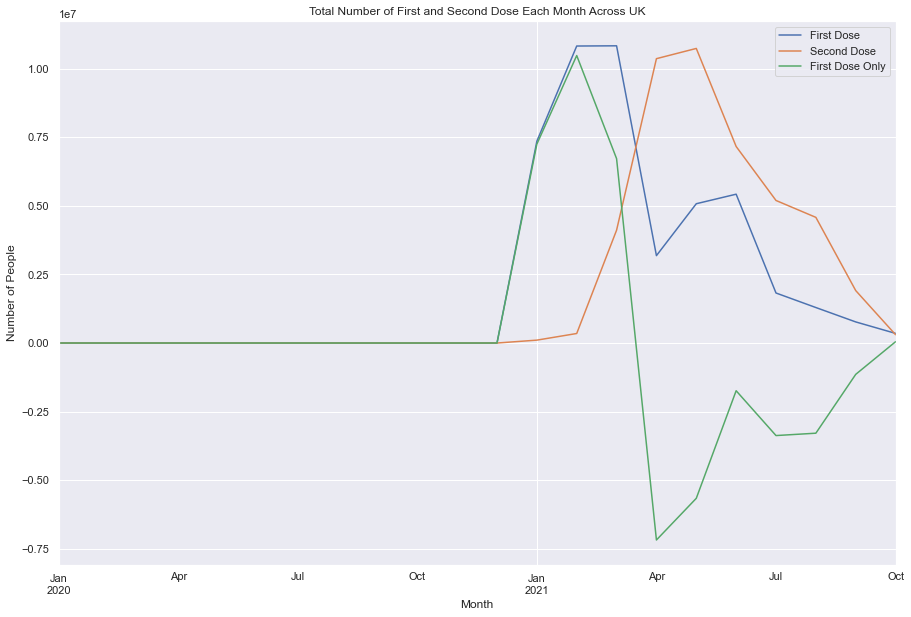

In [60]:
# Create line plot for first dose and second dose
covid_uk_month[['First Dose','Second Dose', 'First Dose Only']].plot()
plt.title('Total Number of First and Second Dose Each Month Across UK')
plt.ylabel('Number of People')
plt.xlabel('Month')

# Save and export figure
plt.savefig('Total Number of First and Second Dose Each Month Across UK')

### 4) Assignment activity 4: [Visualise and identify initial trends](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-4-visualise-and-identify-initial-trends?module_item_id=21381)

### Absolute numbers & sort and display

**Report:** According to the absolute totals, the top three province, Gibraltar, Montserrat and British Virgin Islands, have 265,000, 244,000, and 230,000 people respectively who are eligible for second dose.

In [61]:
# Where should the government target?
abs_province = covid_uk_province.sort_values(by='First Dose Only', ascending=False).reset_index()
abs_province

,Province/State,Vaccinated,First Dose,Second Dose,First Dose Only,First Dose Only %,Second Dose %
0,Gibraltar,5606041,5870786,5606041,264745,4.722495,95.277505
1,Montserrat,5157560,5401128,5157560,243568,4.722543,95.277457
2,British Virgin Islands,4933315,5166303,4933315,232988,4.722747,95.277253
3,Anguilla,4709072,4931470,4709072,222398,4.722756,95.277244
4,Isle of Man,4036345,4226984,4036345,190639,4.723060,95.276940
5,Falkland Islands (Malvinas),3587869,3757307,3587869,169438,4.722525,95.277475
6,Cayman Islands,3363624,3522476,3363624,158852,4.722644,95.277356
7,Channel Islands,3139385,3287646,3139385,148261,4.722613,95.277387
8,Turks and Caicos Islands,2915136,3052822,2915136,137686,4.723142,95.276858
9,Bermuda,2690908,2817981,2690908,127073,4.722309,95.277691


Text(0.5, 1.0, 'Number of First Dose Only in Each Province')

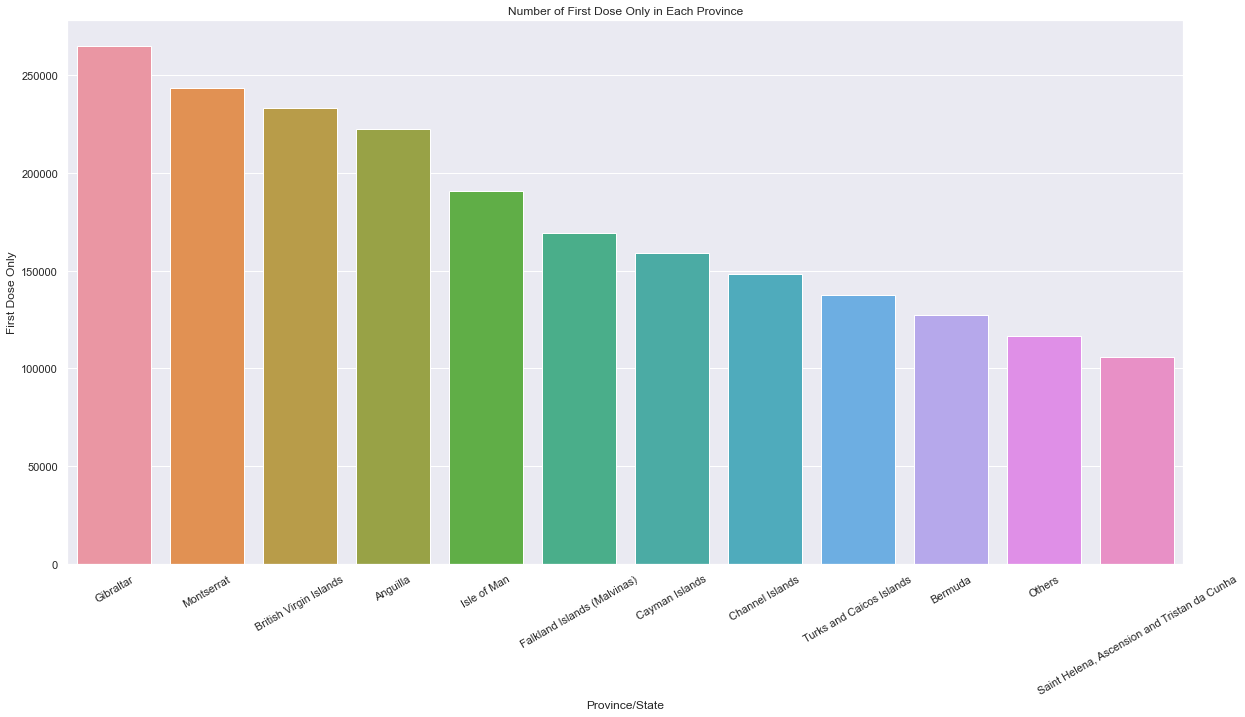

In [62]:
# Absolute numbers visualisation - Number of First Dose Only per province
# Create a grouped barplot
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x='Province/State', y='First Dose Only', data=abs_province)

# Rotate label
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

# Set title of plot
ax.set_title('Number of First Dose Only in Each Province')

### Relative numbers (%) Sort and Display

**Report:** While percentage of first dose only is similar due to same government vaccination strategy, the differences can be compared based on third and fourth decimal places as ratio of 7-digit numbers may minimise differences. In this case, Turks and Caicos Islands have slightly higher percentage than the rest. However, government should advertise based on total numbers of first dose only group because the objective is to increase vaccination rate and higher percentage does not necessarily represent larger group size.

In [63]:
# Where should the government target?
rel_province = covid_uk_province.sort_values(by='First Dose Only %', ascending=False).reset_index()
rel_province

,Province/State,Vaccinated,First Dose,Second Dose,First Dose Only,First Dose Only %,Second Dose %
0,Turks and Caicos Islands,2915136,3052822,2915136,137686,4.723142,95.276858
1,Isle of Man,4036345,4226984,4036345,190639,4.723060,95.276940
2,Anguilla,4709072,4931470,4709072,222398,4.722756,95.277244
3,British Virgin Islands,4933315,5166303,4933315,232988,4.722747,95.277253
4,Cayman Islands,3363624,3522476,3363624,158852,4.722644,95.277356
5,Channel Islands,3139385,3287646,3139385,148261,4.722613,95.277387
6,Montserrat,5157560,5401128,5157560,243568,4.722543,95.277457
7,Falkland Islands (Malvinas),3587869,3757307,3587869,169438,4.722525,95.277475
8,Gibraltar,5606041,5870786,5606041,264745,4.722495,95.277505
9,Bermuda,2690908,2817981,2690908,127073,4.722309,95.277691


### Visualise - Smooth out the data by looking at monthly figures

Since Gibraltar is the targeted region, analysis on granular level is conducted to inform government in customising campaign message.

### Gibraltar Vaccination

**Report:** On a monthly basis, the Gibraltar vaccination trend is the same as that of entire UK. Majority received first dose by March and second dose exceeded first dose in April. A downward trend is then observed for both doses as majority of population may have already received one or two doses. However, this needs to be further investigated with population data.

In [64]:
# Gilbraltar vaccination over month
# Filter Gilbraltar
Gibraltar_only = covid_uk[covid_uk['Province/State'] == 'Gibraltar']

# Make a copy
Gibraltar_covid = Gibraltar_only.copy()

# Convert Date to Month
Gibraltar_covid['Month'] = pd.to_datetime(Gibraltar_covid['Date']+pd.offsets.MonthBegin(-1))

# Aggregate by month
Gibraltar_month = Gibraltar_covid.groupby('Month')[['Vaccinated', 'First Dose','Second Dose', 'First Dose Only']].sum()

# View DataFrame
Gibraltar_month

,Vaccinated,First Dose,Second Dose,First Dose Only
Month,,,,
2020-01-01,0,0,0,0
2020-02-01,0,0,0,0
2020-03-01,0,0,0,0
2020-04-01,0,0,0,0
2020-05-01,0,0,0,0
2020-06-01,0,0,0,0
2020-07-01,0,0,0,0
2020-08-01,0,0,0,0
2020-09-01,0,0,0,0


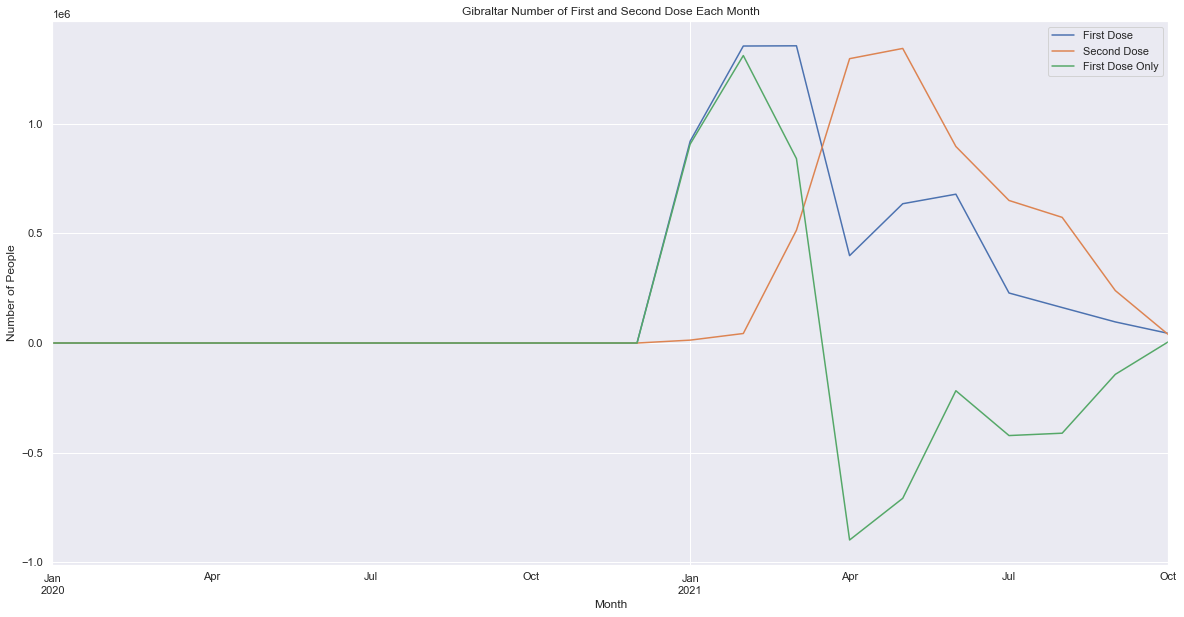

In [65]:
# Plot over month
Gibraltar_month[['First Dose','Second Dose', 'First Dose Only']].plot()
plt.title('Gibraltar Number of First and Second Dose Each Month')
plt.ylabel('Number of People')
plt.xlabel('Month')

# Save and export figure
plt.savefig('Gibraltar Number of First and Second Dose Each Month')

### Recoveries by Province

**Report:** Channel Islands has highest number of recoveries, then followed by Gibraltar. The government can consider omitting this Channel Islands in initial campaign runs to invest resources in other provinces of priority to increase vaccination rate.

In [66]:
# Group recoveries by province
recovered_uk = covid_uk.groupby(['Province/State'])[['Recovered','Cases']].max().reset_index().sort_values(by='Recovered',ascending=False)

# View DataFrame
recovered_uk

,Province/State,Recovered,Cases
4,Channel Islands,8322,12135
6,Gibraltar,4670,5727
7,Isle of Man,4019,8343
1,Bermuda,2503,5548
11,Turks and Caicos Islands,2433,2910
2,British Virgin Islands,1914,2725
3,Cayman Islands,635,1011
9,Others,344,8317439
0,Anguilla,111,644
5,Falkland Islands (Malvinas),63,69


### Gibraltar Recoveries

**Report:** Gibraltar recoveries significantly increased in January when vaccination began, then stabilised until July when majority were receiving first and second dose. Moreover, cases also decreased indicated by flat slope. This implies a positive correlation in increased recoveries and less cases due to vaccination. Hence, government can utilise this data to convey positive impacts of vaccinations in campaign.

In [67]:
# Gilbraltar recoveries and cases over time
# Filter Gilbraltar
gib_only_rec = covid_uk[covid_uk['Province/State'] == 'Gibraltar']

# Make a copy
gib_rec = gib_only_rec.copy()

# Convert Date to Month
gib_rec['Month'] = pd.to_datetime(gib_rec['Date']+pd.offsets.MonthBegin(-1))

# Group by month
recovered_gib = gib_rec.groupby(['Month'])[['Recovered','Cases']].max()

# View DataFrame
recovered_gib

,Recovered,Cases
Month,,
2020-01-01,0,0
2020-02-01,0,0
2020-03-01,34,81
2020-04-01,131,144
2020-05-01,151,170
2020-06-01,176,178
2020-07-01,182,188
2020-08-01,237,290
2020-09-01,349,410


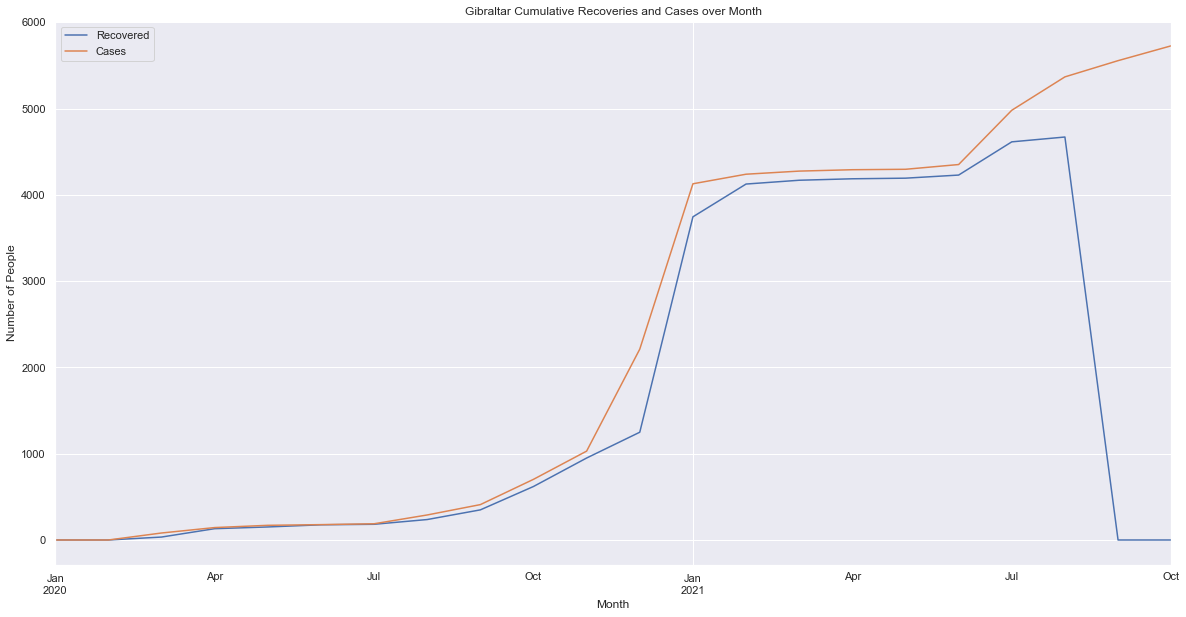

In [68]:
# Plot recoveries and cases over month
recovered_gib.plot()

# Add labels
plt.title('Gibraltar Cumulative Recoveries and Cases over Month')
plt.ylabel('Number of People')
plt.xlabel('Month')


# Save and export figure
plt.savefig('Gibraltar Cumulative Recoveries and Cases over Month')

### Deaths by Province

**Report:** Gibraltar ranks third with highest number of deaths. However, considering that Others province is 1000 times more than Channels Island, numbers may correspond with their population size.

In [69]:
# Group recoveries by province
uk_deaths_province = covid_uk.groupby(['Province/State'])[['Deaths','Cases']].max().reset_index().sort_values(by='Deaths',ascending=False)

# Calculate death rate
uk_deaths_province['Death Rate %'] = uk_deaths_province['Deaths']/uk_deaths_province['Cases']*100

# View DataFrame and sort by death rate
uk_deaths_province.round(2).sort_values(by='Deaths', ascending=False)

,Province/State,Deaths,Cases,Death Rate %
9,Others,138237,8317439,1.66
4,Channel Islands,100,12135,0.82
6,Gibraltar,97,5727,1.69
1,Bermuda,95,5548,1.71
7,Isle of Man,54,8343,0.65
2,British Virgin Islands,37,2725,1.36
11,Turks and Caicos Islands,23,2910,0.79
3,Cayman Islands,2,1011,0.20
0,Anguilla,1,644,0.16
8,Montserrat,1,41,2.44


### UK - Death Trend

In [70]:
# Aggregate deaths by province and month
uk_deaths = covid_uk.groupby(['Province/State','Month_x'])[['Deaths','Cases']].max().reset_index()

uk_deaths

,Province/State,Month_x,Deaths,Cases
0,Anguilla,2020-01-01,0,0
1,Anguilla,2020-02-01,0,0
2,Anguilla,2020-03-01,0,2
3,Anguilla,2020-04-01,0,3
4,Anguilla,2020-05-01,0,3
...,...,...,...,...
259,Turks and Caicos Islands,2021-06-01,18,2425
260,Turks and Caicos Islands,2021-07-01,18,2486
261,Turks and Caicos Islands,2021-08-01,20,2653
262,Turks and Caicos Islands,2021-09-01,23,2854


Text(0.5, 1.0, 'Number of Deaths Each Month')

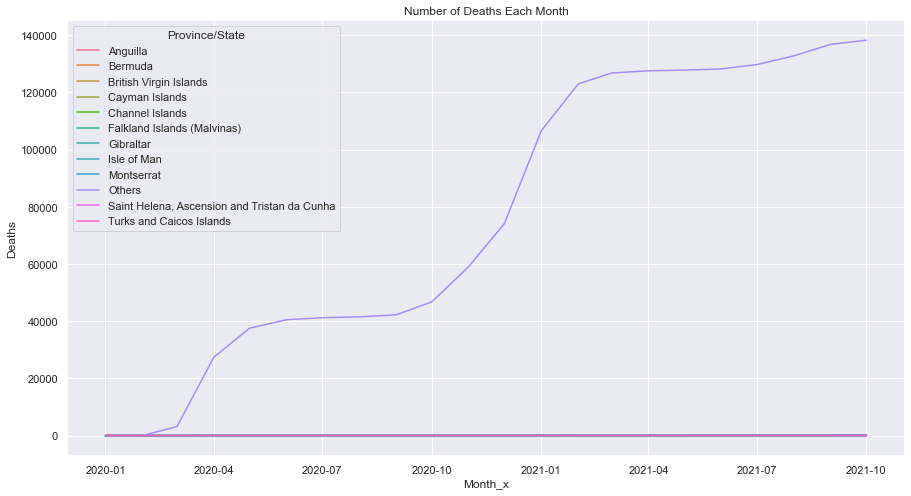

In [71]:
# Plot deaths of each province over time
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Month_x', y='Deaths',hue='Province/State', data=uk_deaths).set_title('Number of Deaths Each Month')

Others province is causing skewed data, thereofore, it is excluded and replotted below.

In [72]:
# Exclude Others which skewed data
uk_deaths_excluded = uk_deaths[uk_deaths['Province/State'] != 'Others']

uk_deaths_excluded.shape

(242, 4)

Text(0.5, 1.0, 'Number of Deaths Each Month')

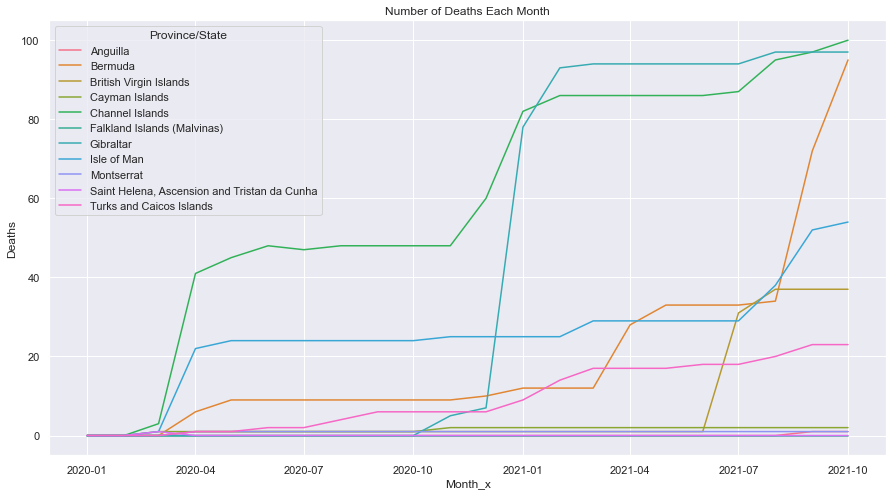

In [73]:
# Plot deaths of each province over time excluding Others
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Month_x', y='Deaths',hue='Province/State', data=uk_deaths_excluded).set_title('Number of Deaths Each Month')

### Gibraltar - Deaths Trend

**Report:** Gibraltar death trend has similar patterns with cases when it reached peak in January, but soon in February it stabilised with a flat slope when vaccination was implemented. This implies the vaccine may have a positive impact in reducing number of deaths. The government can also include this factor in marketing message. 

It is important to analyse data from multiple perspectives because other factors that may impact the result can be discovered and ensure a holistic view is provided for the government to make the best decision and avoid biased views.

In [74]:
# Plot Channel Islands and Gilbralar only
uk_deaths_cluster = uk_deaths[uk_deaths['Province/State'].isin(['Gibraltar', 'Channel Islands'])]

# View DataFrame
uk_deaths_cluster.groupby(['Province/State','Month_x'])[['Deaths']].sum()

Deaths
Province/State  Month_x           
Channel Islands 2020-01-01       0
                2020-02-01       0
                2020-03-01       3
                2020-04-01      41
                2020-05-01      45
                2020-06-01      48
                2020-07-01      47
                2020-08-01      48
                2020-09-01      48
                2020-10-01      48
                2020-11-01      48
                2020-12-01      60
                2021-01-01      82
                2021-02-01      86
                2021-03-01      86
                2021-04-01      86
                2021-05-01      86
                2021-06-01      86
                2021-07-01      87
                2021-08-01      95
                2021-09-01      97
                2021-10-01     100
Gibraltar       2020-01-01       0
                2020-02-01       0
                2020-03-01       0
                2020-04-01       0
                2020-05-01       0
                2020-06-01       0
                2020-07-01       0
                2020-08-01       0
                2020-09-01       0
                2020-10-01       0
                2020-11-01       5
                2020-12-01       7
                2021-01-01      78
                2021-02-01      93
                2021-03-01      94
                2021-04-01      94
                2021-05-01      94
                2021-06-01      94
                2021-07-01      94
                2021-08-01      97
                2021-09-01      97
                2021-10-01      97

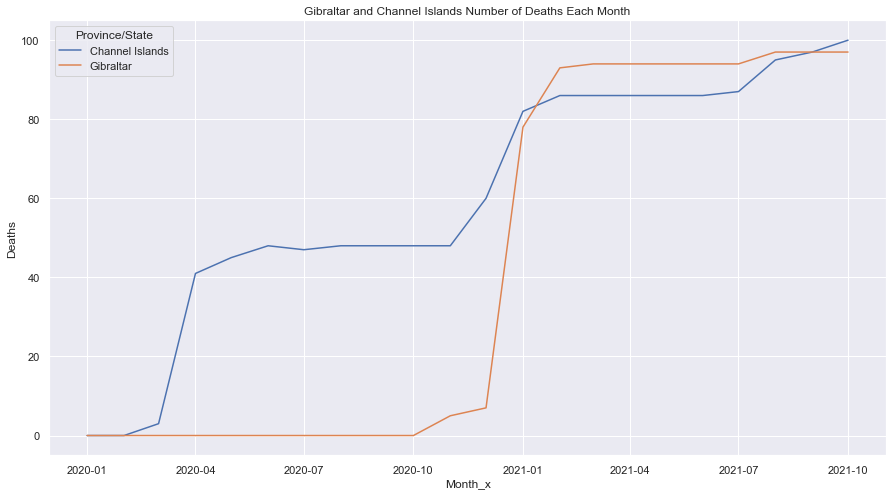

In [75]:
# Plot deaths of each province over time
sns.set(rc = {'figure.figsize':(15,8)})
sns_plot = sns.lineplot(x='Month_x', y='Deaths',hue='Province/State', data=uk_deaths_cluster)\
.set(title='Gibraltar and Channel Islands Number of Deaths Each Month')

# Save figure
plt.savefig('Gibraltar and Channel Islands Number of Deaths Each Month.png')

## 5) Assignment activity 5: External data: [Analyse the Twitter data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-5-analyse-the-twitter-data?module_item_id=21383)

### 5.1) Report:

**Report:** The number of hashtags related to covid in 100 tweets extracted from March 18th to 21st, 2022 was analysed. The tweets dataset was explored by identifying variables of interest including text of tweet, then extracting all hashtags and append into a list using a loop. Out of the top 10 hashtags used in the tweets, top 4 were related to covid.

In [76]:
# Import the tweet dataset (`tweets_2.csv`)
tweets_2 = pd.read_csv(dir + '/tweets_2.csv')

# Print
print('Imported successfully')

Imported successfully


In [77]:
# Explore the data: info(), head()
tweets_2.shape

(100, 29)

In [78]:
# View DataFrame information including data types
tweets_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 100 non-null    object 
 1   id                         100 non-null    int64  
 2   id_str                     100 non-null    int64  
 3   text                       100 non-null    object 
 4   truncated                  100 non-null    bool   
 5   entities                   100 non-null    object 
 6   metadata                   100 non-null    object 
 7   source                     100 non-null    object 
 8   in_reply_to_status_id      8 non-null      float64
 9   in_reply_to_status_id_str  8 non-null      float64
 10  in_reply_to_user_id        11 non-null     float64
 11  in_reply_to_user_id_str    11 non-null     float64
 12  in_reply_to_screen_name    11 non-null     object 
 13  user                       100 non-null    object 


In [79]:
# View DataFrame
tweets_2.tail()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
95,Fri Mar 18 11:43:35 +0000 2022,1504785582656008202,1504785582656008202,#CovidIsNotOver #COVID19 #coronavirus #Omicron...,True,"{'hashtags': [{'text': 'CovidIsNotOver', 'indi...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1,0,False,False,und,False,1.504715e+18,1.504715e+18,{'created_at': 'Fri Mar 18 07:03:00 +0000 2022...,NaN
96,Fri Mar 18 11:32:16 +0000 2022,1504782734924918830,1504782734924918830,"The sun is shining. The doors are open, it’s n...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
97,Fri Mar 18 11:31:50 +0000 2022,1504782625491333123,1504782625491333123,@joeldommett @ZoeTheBall @kylieminogue so all...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
98,Fri Mar 18 11:20:59 +0000 2022,1504779896786243585,1504779896786243585,#COVID19 was mentioned on the death certificat...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
99,Fri Mar 18 10:47:26 +0000 2022,1504771451940974611,1504771451940974611,Right it couldn't happen here could it. Brexit...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,2,5,False,False,en,False,NaN,NaN,NaN,NaN


In [80]:
# Explore the structure, count the tweets, get the elements of interest
len(tweets_2['text'].unique())

100

In [81]:
# Missing values in text columns
tweets_2.isna().sum()

created_at                     0
id                             0
id_str                         0
text                           0
truncated                      0
entities                       0
metadata                       0
source                         0
in_reply_to_status_id         92
in_reply_to_status_id_str     92
in_reply_to_user_id           89
in_reply_to_user_id_str       89
in_reply_to_screen_name       89
user                           0
geo                           97
coordinates                   97
place                          0
contributors                 100
is_quote_status                0
retweet_count                  0
favorite_count                 0
favorited                      0
retweeted                      0
lang                           0
possibly_sensitive            34
quoted_status_id              88
quoted_status_id_str          88
quoted_status                 88
extended_entities             86
dtype: int64

In [82]:
# Create a dataframe with the text only
tweets_list = tweets_2['text']
tweets_list

0     @Johnrashton47 When #diabetes has been the big...
1     Disturbing figures from @fsb_policy @indparltr...
2     NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...
3     I'm do sick of coming on twitter to see the sa...
4     The rollout of new #COVID19 #Booster jabs to #...
                            ...                        
95    #CovidIsNotOver #COVID19 #coronavirus #Omicron...
96    The sun is shining. The doors are open, it’s n...
97    @joeldommett @ZoeTheBall @kylieminogue  so all...
98    #COVID19 was mentioned on the death certificat...
99    Right it couldn't happen here could it. Brexit...
Name: text, Length: 100, dtype: object

In [83]:
# Loop through the messages and build a list of values containing the #-symbol
hashtags_list = []
for tweet in tweets_list:
    hashtags = [i  for i in tweet.split() if i.startswith("#") ]
    hashtags_list.append(hashtags)

In [84]:
# create function
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [85]:
# run function to append all list of hashtags together
flat_hashtags_list = flatten_list(hashtags_list)

# convert list to series
flat_hashtags = pd.Series(flat_hashtags_list)

# View series of hashtags
flat_hashtags.head()

0    #diabetes
1     #COVID19
2    #Stormont
3     #covid19
4    #borisOut
dtype: object

In [86]:
# Count number of occurance for each hashtag
counts = flat_hashtags.value_counts()

# View count
counts.head()

#COVID19           53
#covid19            7
#CovidIsNotOver     3
#coronavirus        3
#covid              2
dtype: int64

In [87]:
# Convert hashtags with count to DataFrame
counts_df = counts.to_frame(name="counts")
counts_df = counts_df.rename_axis('hashtags').reset_index()
counts_df.sort_values(by='counts', ascending=False).head(10)

,hashtags,counts
0,#COVID19,53
1,#covid19,7
2,#CovidIsNotOver,3
3,#coronavirus,3
4,#covid,2
5,#Brexit,2
6,#Partygate,2
56,#breaking,1
63,#borisOut,1
62,#BrexitDisaster,1


In [88]:
# Filter and sort
filter_df = counts_df[counts_df['hashtags'].str.contains('#cov|#boost|#pandem|#coron|#vacc|#jab', case=False)]

# View sorted DataFrame
filter_df

,hashtags,counts
0,#COVID19,53
1,#covid19,7
2,#CovidIsNotOver,3
3,#coronavirus,3
4,#covid,2
12,#Covid19,1
29,#coronavirusuk,1
31,#Corona,1
32,#pandemic,1
36,#COVID19…,1


In [89]:
# Total number of covid hashtags
print('\nTotal number of hashtags related to covid:')
filter_df['counts'].sum()


Total number of hashtags related to covid:


79

In [90]:
# Time period of tweets
date_split = tweets_2['created_at'].str.split(' ', expand = True)
date_split.tail()

,0,1,2,3,4,5
95,Fri,Mar,18,11:43:35,+0000,2022
96,Fri,Mar,18,11:32:16,+0000,2022
97,Fri,Mar,18,11:31:50,+0000,2022
98,Fri,Mar,18,11:20:59,+0000,2022
99,Fri,Mar,18,10:47:26,+0000,2022


In [91]:
# Month of tweets
date_split[1].unique()

array(['Mar'], dtype=object)

In [92]:
# Days of tweets
date_split[2].unique()

array(['21', '20', '19', '18'], dtype=object)

In [93]:
# Year of tweets
date_split[5].unique()

array(['2022'], dtype=object)

Time period of tweets are from 18 March to 21 March 2022.

### 6) Assignment activity 6: [Perform time-series analysis](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-6-perform-time-series-analysis?module_item_id=22584)

## Week 6: Assignment (Partial notebook)

**Instruction:**
The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that was developed by the consultant. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [94]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [95]:
# Load and select relevant subset of the data.
# Make sure to change the relative path to function in your environment.
# ds1 = pd.read_csv(dir + '/covid_19_uk_cases.csv')
# ds2 = pd.read_csv(dir + '/covid_19_uk_vaccinated.csv')

sample = cov_uk_clean[['Province/State','Date','Hospitalised']]

In [96]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [97]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above. 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe.
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

In [98]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

**Instructions:** The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

**Report:** Data structure was explored, and outliers was identified using boxplot to exclude any numbers according to interquartile range. However, considering numbers are daily, it is not necessary to remove outliers because they represent peaks of the number of people hospitalised.

In [99]:
# Check for missing values
sample_ci.isna().sum()

Province/State    0
Date              0
Hospitalised      0
dtype: int64

In [100]:
# View data types
sample_ci.dtypes

Province/State            object
Date              datetime64[ns]
Hospitalised               int64
dtype: object

In [101]:
# View DataFrame
sample_ci

,Province/State,Date,Hospitalised
2528,Channel Islands,2020-01-22,0
2529,Channel Islands,2020-01-23,0
2530,Channel Islands,2020-01-24,0
2531,Channel Islands,2020-01-25,0
2532,Channel Islands,2020-01-26,0
...,...,...,...
3155,Channel Islands,2021-10-10,481
3156,Channel Islands,2021-10-11,491
3157,Channel Islands,2021-10-12,491
3158,Channel Islands,2021-10-13,0


In [102]:
# Create copy of DataFrame
sample_ci_copy = sample_ci.copy()
sample_ci_copy['Hospitalised'].describe().round(2)

count     632.00
mean      575.46
std       641.57
min         0.00
25%        88.75
50%       378.00
75%       867.00
max      2748.00
Name: Hospitalised, dtype: float64

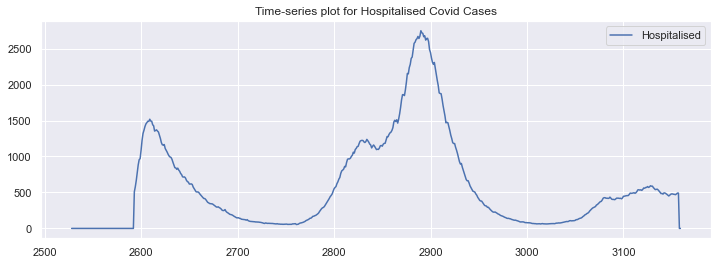

In [103]:
sample_ci_copy['Hospitalised'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Time-series plot for Hospitalised Covid Cases')
plt.show(block=False)

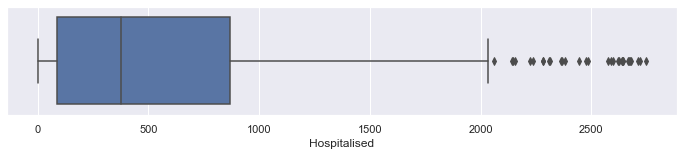

In [104]:
# Identify outlier
# whis=multiplicative factor
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=sample_ci_copy['Hospitalised'], whis=1.5)

In [105]:
# Removing outlier from dataset of hospitalised
cols = ['Hospitalised'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = sample_ci_copy[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = sample_ci_copy[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# # Return a boolean array of the rows with (any) non-outlier column values
condition = ~((sample_ci_copy[cols] < (Q1 - 1.5 * IQR)) | (sample_ci_copy[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
sample_ci_copy_nonoutlier = sample_ci_copy[condition]
sample_ci_copy_nonoutlier.shape

(600, 3)

In [106]:
# Calculate lowest number of acceptance
lowest_outliers = Q1 - (1.5 * IQR)
lowest_outliers

Hospitalised   -1078.625
dtype: float64

In [107]:
# Calculate highest number of acceptance
highest_outliers = Q3 + (1.5 * IQR)
highest_outliers

Hospitalised    2034.375
dtype: float64

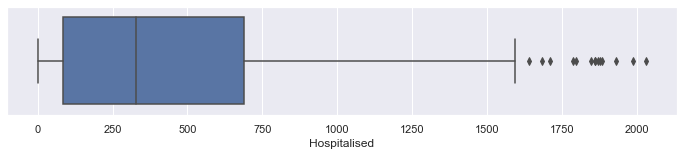

In [108]:
# Plot with outliers removed
# whis=multiplicative factor
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=sample_ci_copy_nonoutlier['Hospitalised'], whis=1.5)

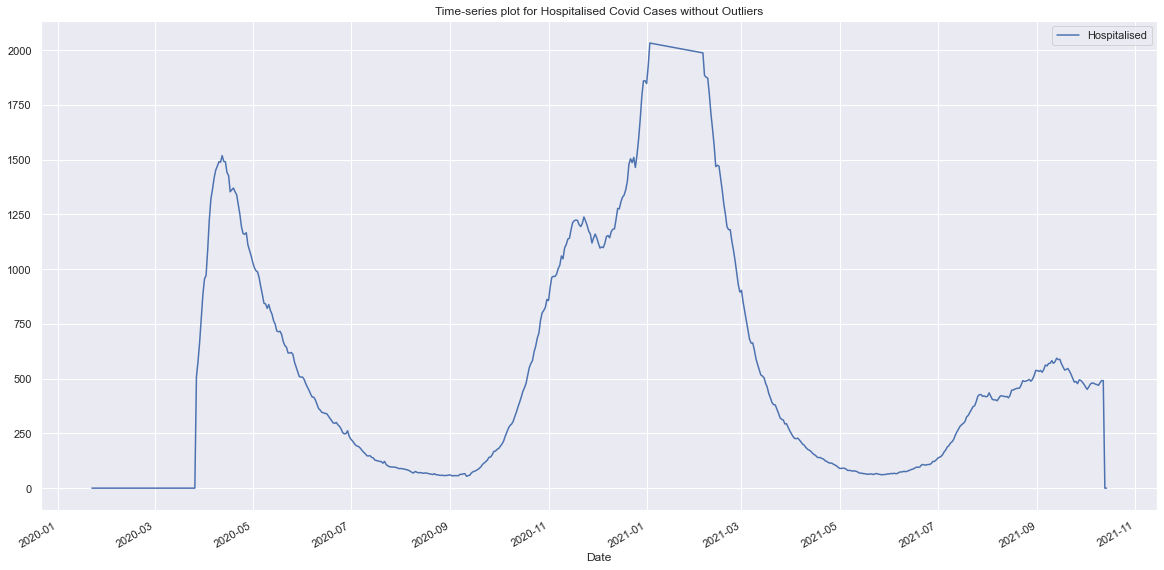

In [109]:
# Plot line plot without outliers
sample_ci_copy_nonoutlier.plot('Date','Hospitalised',figsize=(20, 10))
plt.legend(loc='best')
plt.title('Time-series plot for Hospitalised Covid Cases without Outliers')
plt.show(block=False)

### Channel Islands - Moving Average

**Report:** The moving average captures the average change in data series over time and eliminates irregularities. In the 7 days Moving Average chart, the hospitalisation trend of Channel Islands can be better interpreted. Numbers reached peak in around February but decreased significantly with a steep downward slope in March 2021. This corresponds with the time of vaccination program implemented beginning in January 2021, meaning vaccines may have reduced number of hospitalisation and symptoms of patients were less severe. The future trend is leaning towards a downward slope in October 2021.

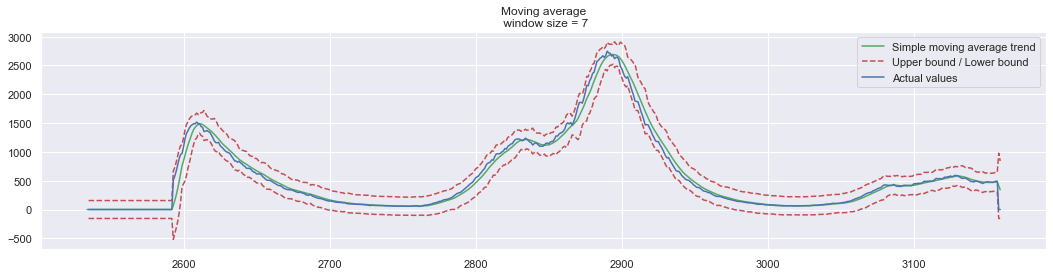

In [110]:
# Plot moving average with 7 days smoothing
plot_moving_average(sample_ci_copy.Hospitalised, 7, plot_intervals=True)

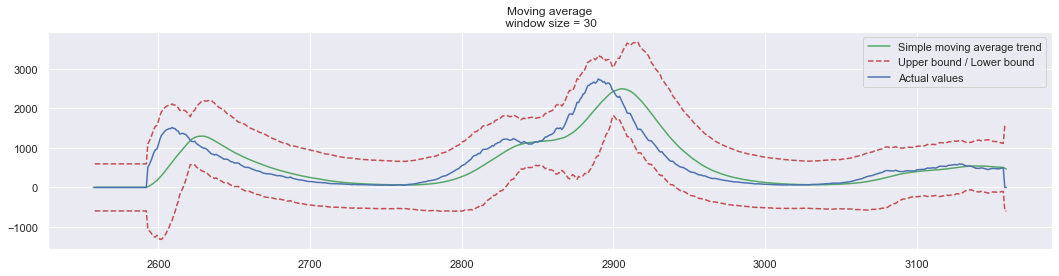

In [111]:
# Plot moving average with 30 days smoothing
plot_moving_average(sample_ci_copy.Hospitalised, 30, plot_intervals=True)

### Question 2:

**Instructions:** The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [112]:
# Return top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Date,Hospitalised,error
2593,Channel Islands,2020-03-27,509,436.285714
2594,Channel Islands,2020-03-28,579,423.571429
2595,Channel Islands,2020-03-29,667,416.285714


**Report:** The 'error' column represents the mean absolute error (MAE) which is used to measure accuracy of SMA 7 days forecast. MAE calculates the difference between actual hospitalised value and forecasted value moving average. It indicates how big of an error to
expect on average from the forecast. The top three days with the highest MAE imply that the forecast's distance from the true value is very high, therefore, is less reliable. The government should take this into consideration when allocating marketing recourses based on forecast of hospitalisation number. 

## Conclusion & Recommendation

**Report:** In conclusion, Gibraltar has the highest number of people at 264,745 who are eligible to received second dose, then Montserrat and British Virgin Islands. According to the analysis, vaccinations have a positive impact on reducing cases, deaths, hospitalisation and increasing recoveries as vaccines became available in January 2021. Beginning in March, the pandemic began to stabilise as cases indicate a flat slope across UK.

Therefore, the government is recommended to target Gibraltar, Montserrat, and British Virgin Islands in the campaign to increase the vaccination rate. In marketing messages, emphasis vaccination reduces severity of symptoms as deaths decreased and leads to faster recoveries as numbers increased correspondingly.

After peak of the pandemic in March, top 4 of the trending twitter hashtags were covid related. The government can consider monitoring external data like tweets to get real-time market information of the public’s reaction to the campaigns. However, completeness and reliability of data must be validated.

Lastly, the government is advised to invest in data resources to forecast vaccination and covid cases trend to devise better strategy to mitigate negative impacts of the coronavirus.